<a href="https://colab.research.google.com/github/GuilhermeVCCdaSilva/ProjetoBD/blob/main/ProjetoBigData_GuilhermeSilvaMarineFournieGon%C3%A7aloAlves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing required packages
!pip install pyspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 17.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=2587ae762b8af4fc343422eb0be35feeb925cbac386dfee91479c08d38bb00b5
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Creating a SparkSession
Uma **SparkSession** é o ponto de entrada principal para trabalhar com dados no Spark. Ele é responsável por gerenciar a configuração do Spark, criar RDDs (Resilient Distributed Datasets) e DataFrames, registrar tabelas temporárias e gerenciar o conjunto de recursos de cluster que estão sendo usados.

A SparkSession é a classe principal do Spark SQL, que é o módulo do Spark que permite trabalhar com dados estruturados e relacionais. Ele permite que você execute consultas SQL, manipule DataFrames e extraia metadados. Ele também oferece acesso às bibliotecas de processamento de fluxo de dados (como o DataFrame API e o SQL) e às bibliotecas de aprendizado de máquina (como o MLlib) do Spark.

Uma SparkSession é criada usando o SparkSession.builder. É possível configurar a sessão com várias opções, como o nome do aplicativo, o endereço do cluster, o número de núcleos para usar e a quantidade de memória. Além disso, é possível usar a SparkSession para gerenciar configurações globais, como as configurações de memória e de arquivo de log.

.config("spark.memory.offHeap.enabled","true") é uma configuração utilizada para habilitar o uso de memória fora da heap (off-heap) no Spark. Quando essa configuração é definida como "true", o Spark pode usar memória fora do heap do JVM para armazenar os dados e realizar operações. Isso pode ser útil quando o heap do JVM não é suficiente para armazenar todos os dados, permitindo que o Spark use mais memória do que o heap para melhorar o desempenho das operações.

.config("spark.memory.offHeap.size","10g") é uma configuração utilizada para definir a quantidade de memória fora da heap (off-heap) que o Spark pode usar. O valor "10g" indica que o Spark pode usar até 10 gigabytes de memória fora da heap. Esse valor pode ser ajustado de acordo com o tamanho dos dados e as necessidades do seu aplicativo.

In [2]:
from pyspark.sql import SparkSession
import findspark

findspark.init()

spark = SparkSession.builder.appName("Pyspark Tutorial")\
                    .config("spark.memory.offHeap.enabled","true")\
                    .config("spark.memory.offHeap.size","10g")\
                    .getOrCreate()
spark                    

In [3]:
!curl https://raw.githubusercontent.com/GuilhermeVCCdaSilva/ProjetoBD/main/Absenteeism_at_work.csv >> Absenteeism_at_work.csv
df = spark.read.csv('Absenteeism_at_work.csv',header=True,sep=";")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45232  100 45232    0     0  61041      0 --:--:-- --:--:-- --:--:-- 60959


In [4]:
df.show(10)

+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| ID|Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day |Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| 11|                26|               7|              3|      1|                   289|                        

#Este DataSet contém várias colunas tais como:

1.  ID: Identificador único para cada registo.
2.    Razão para a ausência: Razão para a ausência do funcionário no trabalho.
3.    Mês da ausência: O mês em que o funcionário estava ausente.
4.    Dia da semana: O dia da semana em que o funcionário estava ausente.
5.    Estações: A estação do ano em que o funcionário estava ausente.
6.    Despesas de transporte: As despesas de transporte incorridas pelo funcionário ao viajar para o trabalho.
7.    Distância da residência para o trabalho: A distância entre a residência do funcionário e o local de trabalho.
8.    Tempo de serviço: O período de tempo em que o funcionário está a trabalhar na empresa.
9.    Idade: A idade do funcionário.
10.    Carga de trabalho média/dia: A carga de trabalho média do funcionário por dia.
11.    Alvo atingido: Se o funcionário atingiu ou não o alvo
12.    Falha disciplinar: Se o funcionário cometeu alguma falha disciplinar ou não.
12.    Educação: O nível de educação do funcionário.
14.    Filhos: O número de filhos que o funcionário tem.
15.    Bebedor social: Se o funcionário bebe socialmente ou não.
16.    Fumador social: Se o funcionário fuma socialmente ou não.
17.    Animal de estimação: Se o funcionário tem algum animal de estimação ou não.
18.    Peso: O peso do funcionário.
19.    Altura: A altura do funcionário.
20.    Índice de massa corporal: O índice de massa corporal do funcionário.
21.    Tempo de ausência em horas: O número de horas que o funcionário ficou ausente.

#Exploratory Data Analysis

- Check the number of rows and columns in the dataset

In [5]:
print("Number of rows:", df.count())
print("Number of columns:", len(df.columns))

Number of rows: 740
Number of columns: 21


- Check the number of missing values in each column

In [6]:
# create a list to store the number of missing values in each column
missing_values = []

# iterate through the columns in the dataset
for col in df.columns:
    missing_values.append((col, df.filter(df[col].isNull()).count()))

# print the missing values
for col, val in missing_values:
    if val == 0:
        print("{} : No missing values".format(col))
    else:
        print("{} : {} missing values".format(col, val))

ID : No missing values
Reason for absence : No missing values
Month of absence : No missing values
Day of the week : No missing values
Seasons : No missing values
Transportation expense : No missing values
Distance from Residence to Work : No missing values
Service time : No missing values
Age : No missing values
Work load Average/day  : No missing values
Hit target : No missing values
Disciplinary failure : No missing values
Education : No missing values
Son : No missing values
Social drinker : No missing values
Social smoker : No missing values
Pet : No missing values
Weight : No missing values
Height : No missing values
Body mass index : No missing values
Absenteeism time in hours : No missing values


- check the data types of the columns

In [40]:
df.dtypes

[('Reason for absence', 'double'),
 ('Month of absence', 'double'),
 ('Day of the week', 'double'),
 ('Seasons', 'double'),
 ('Transportation expense', 'double'),
 ('Distance from Residence to Work', 'double'),
 ('Service time', 'double'),
 ('Age', 'double'),
 ('Work load Average/day ', 'double'),
 ('Hit target', 'double'),
 ('Disciplinary failure', 'double'),
 ('Education', 'double'),
 ('Son', 'double'),
 ('Social drinker', 'double'),
 ('Social smoker', 'double'),
 ('Pet', 'double'),
 ('Weight', 'double'),
 ('Height', 'double'),
 ('Body mass index', 'double')]

- Convert data type string to double

In [41]:
from pyspark.sql.functions import col
for column in df.columns:
    df = df.withColumn(column, col(column).cast("double"))

In [42]:
df.dtypes

[('Reason for absence', 'double'),
 ('Month of absence', 'double'),
 ('Day of the week', 'double'),
 ('Seasons', 'double'),
 ('Transportation expense', 'double'),
 ('Distance from Residence to Work', 'double'),
 ('Service time', 'double'),
 ('Age', 'double'),
 ('Work load Average/day ', 'double'),
 ('Hit target', 'double'),
 ('Disciplinary failure', 'double'),
 ('Education', 'double'),
 ('Son', 'double'),
 ('Social drinker', 'double'),
 ('Social smoker', 'double'),
 ('Pet', 'double'),
 ('Weight', 'double'),
 ('Height', 'double'),
 ('Body mass index', 'double')]

In [36]:
df = df.drop("ID", column)

- Check the statistics of numerical columns

In [43]:
df.describe().show()

+-------+------------------+------------------+------------------+------------------+----------------------+-------------------------------+------------------+-----------------+----------------------+-----------------+--------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+
|summary|Reason for absence|  Month of absence|   Day of the week|           Seasons|Transportation expense|Distance from Residence to Work|      Service time|              Age|Work load Average/day |       Hit target|Disciplinary failure|         Education|               Son|     Social drinker|      Social smoker|               Pet|            Weight|            Height|   Body mass index|
+-------+------------------+------------------+------------------+------------------+----------------------+-------------------------------+------------------+-----------------+----------------------+------------

- Check the correlation between columns

In [44]:
corr = df.stat.corr("Month of absence", "Transportation expense")
print(corr)

0.13752456639267643


<ipython-input-51-825ed4e78d0d>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))


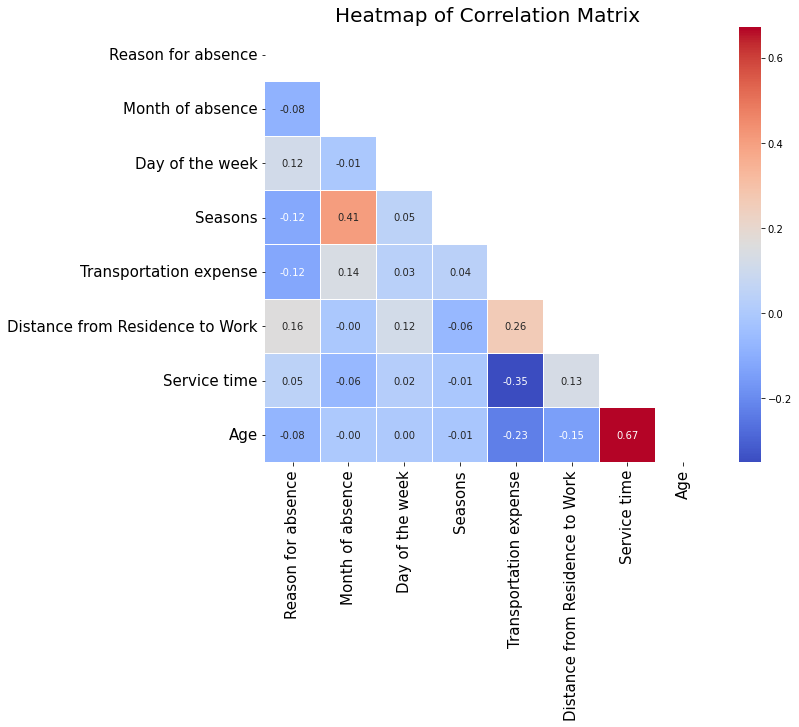

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

num_cols = [c for c in df.columns if df.select(c).dtypes[0][1] == 'double'][:8]
corr_matrix = df.select(num_cols).toPandas().corr()

plt.figure(figsize=(10, 8))
plt.title("Heatmap of Correlation Matrix", fontsize=20)

mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.05, linecolor='white', mask=mask)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

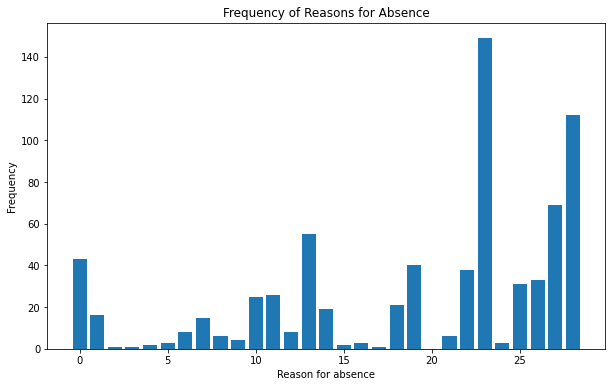

In [45]:
import matplotlib.pyplot as plt

# Count the frequency of each category in "Reason for absence" column
reason_counts = df.groupBy("Reason for absence").count().toPandas()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(reason_counts["Reason for absence"], reason_counts["count"])
plt.xlabel("Reason for absence")
plt.ylabel("Frequency")
plt.title("Frequency of Reasons for Absence")
plt.show()

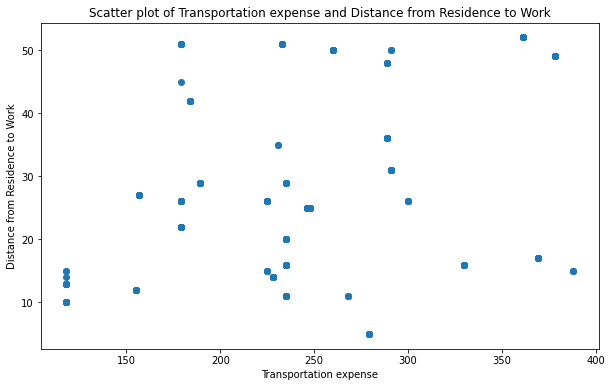

In [47]:
import matplotlib.pyplot as plt

# Extract the columns "Transportation expense" and "Distance from Residence to Work"
x = df.select("Transportation expense").toPandas()
y = df.select("Distance from Residence to Work").toPandas()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel("Transportation expense")
plt.ylabel("Distance from Residence to Work")
plt.title("Scatter plot of Transportation expense and Distance from Residence to Work")
plt.show()

- Check the number of unique values in each column

In [49]:
 for col in df.columns:
    print("Unique values in column '{}':".format(col), df.select(col).distinct().count())

Unique values in column 'Reason for absence': 28
Unique values in column 'Month of absence': 13
Unique values in column 'Day of the week': 5
Unique values in column 'Seasons': 4
Unique values in column 'Transportation expense': 24
Unique values in column 'Distance from Residence to Work': 25
Unique values in column 'Service time': 18
Unique values in column 'Age': 22
Unique values in column 'Work load Average/day ': 38
Unique values in column 'Hit target': 13
Unique values in column 'Disciplinary failure': 2
Unique values in column 'Education': 4
Unique values in column 'Son': 5
Unique values in column 'Social drinker': 2
Unique values in column 'Social smoker': 2
Unique values in column 'Pet': 6
Unique values in column 'Weight': 26
Unique values in column 'Height': 14
Unique values in column 'Body mass index': 17


- check the distribution of each column

In [ ]:
for col in df.columns:
    df.select(col).groupBy(col).count().show()

+----+-----+
|  ID|count|
+----+-----+
| 8.0|    2|
| 7.0|    6|
|29.0|    5|
|35.0|    1|
|18.0|   16|
| 1.0|   23|
|34.0|   55|
|25.0|   10|
|36.0|   34|
| 4.0|    1|
|23.0|    8|
|31.0|    3|
|11.0|   40|
|21.0|    3|
|14.0|   29|
|22.0|   46|
| 3.0|  113|
|19.0|    3|
|28.0|   76|
| 2.0|    6|
+----+-----+
only showing top 20 rows

+------------------+-----+
|Reason for absence|count|
+------------------+-----+
|               8.0|    6|
|               0.0|   43|
|               7.0|   15|
|              18.0|   21|
|               1.0|   16|
|              25.0|   31|
|               4.0|    2|
|              23.0|  149|
|              11.0|   26|
|              21.0|    6|
|              14.0|   19|
|              22.0|   38|
|              19.0|   40|
|               3.0|    1|
|              28.0|  112|
|               2.0|    1|
|              17.0|    1|
|              27.0|   69|
|              10.0|   25|
|              13.0|   55|
+------------------+-----+
only showing t